
The word Ensemble in the context of ML refers to a collection of a finite number of ML models (may include ANN), trained for the same task. Usually the models are trained independently and then their predictions are combined.

When the predictions from different models differ then sometimes it is useful to use the ensemble for classification than any individual classifier. Here, we would like to combine different classifiers and create an ensemble and then use the ensemble for the prediction task.  



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
heart_df = pd.read_csv('./heart.csv', )
heart_df.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
print ('check label counts: ', heart_df['HeartDisease'].value_counts())

label_class = {0:'Healthy', 1:'Ill'}
heart_df['ClassLabel'] = heart_df['HeartDisease'].map(label_class)
heart_df.head(5)

check label counts:  1    508
0    410
Name: HeartDisease, dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ClassLabel
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Healthy
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Ill
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Healthy
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Ill
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Healthy


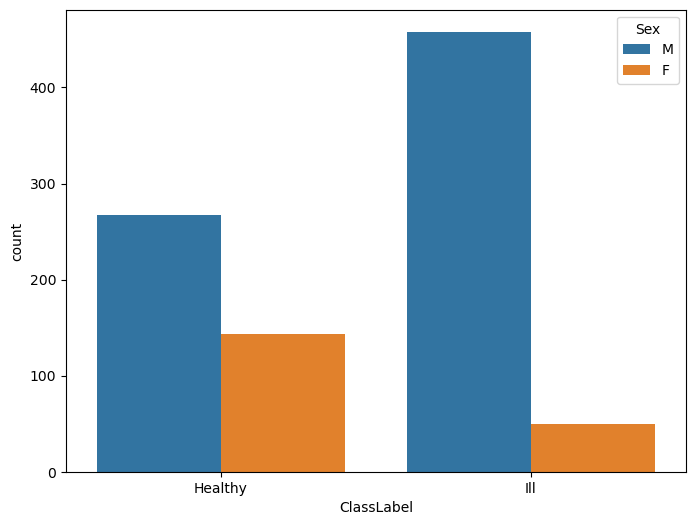

In [4]:
fig, axs = plt.subplots(figsize=(8, 6))
sns.countplot(data = heart_df, x=heart_df['ClassLabel'], hue='Sex', ax=axs)
plt.show()

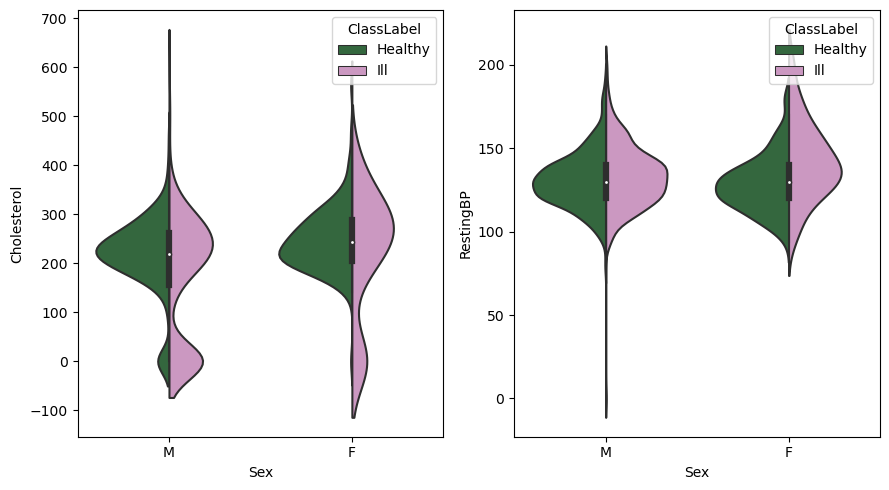

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(9, 5))
axs=axs.flatten()
sns.violinplot(data = heart_df, x='Sex', y='Cholesterol',  
               hue='ClassLabel', palette='cubehelix',
               split=True, ax=axs[0])
sns.violinplot(data = heart_df, x='Sex', y='RestingBP',  
               hue='ClassLabel', palette='cubehelix',
               split=True, ax=axs[1])
plt.tight_layout()
plt.show()

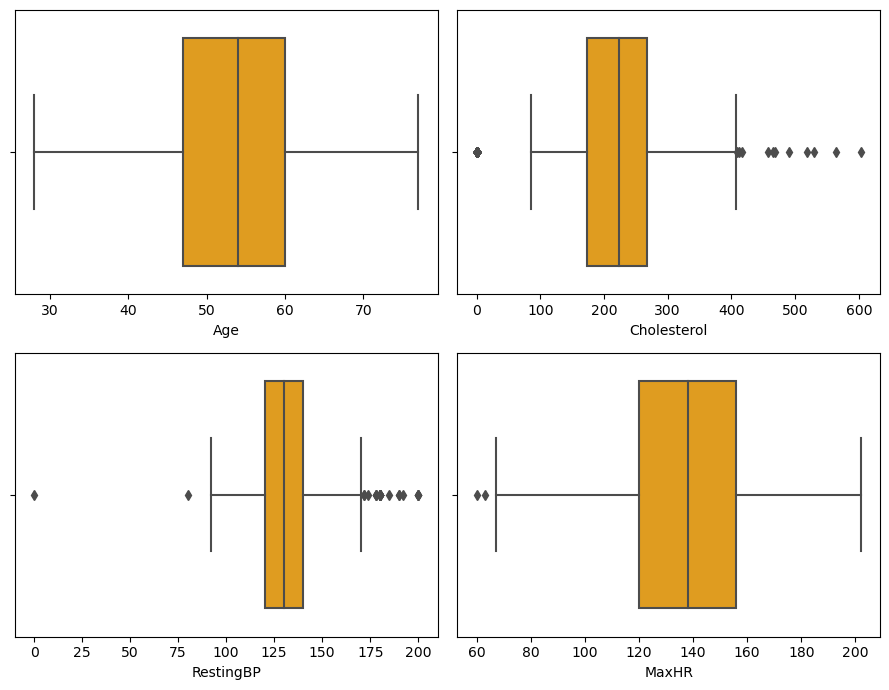

In [6]:
### Check Few Parameter Distributions:

fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()
sns.boxplot(x=heart_df['Age'], color='orange',  ax=axes[0])
sns.boxplot(x=heart_df['Cholesterol'], color='orange',  ax=axes[1])
sns.boxplot(x=heart_df['RestingBP'], color='orange',  ax=axes[2])
sns.boxplot(x=heart_df['MaxHR'], color='orange',  ax=axes[3])
plt.tight_layout()
plt.show()

In [7]:
### seems like Cholesterol have many zero values (bad data points ??)

heart_df_num = heart_df.select_dtypes(exclude=['object'])
print (heart_df_num.shape)
print ('check numerical columns: ', heart_df_num.columns)

(918, 7)
check numerical columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


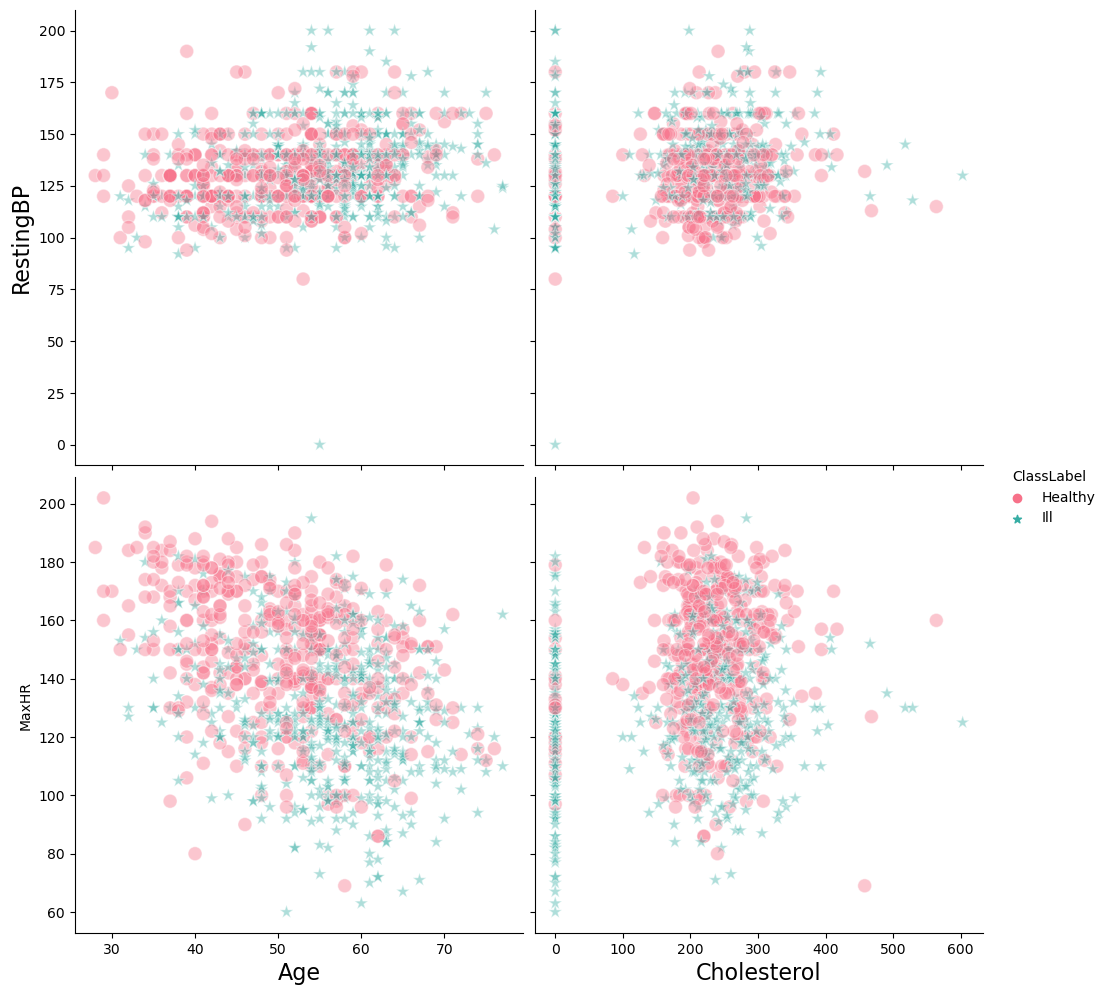

In [29]:
replacements = {'Age': 'Age', 'Cholesterol': 'Cholesterol',
                'RestingBP': 'RestingBP', 'MAXHR': 'MaxHR',
                'Healthy':'Healthy', 'Ill':'Ill'}


h = sns.pairplot(heart_df,
                 x_vars=["Age", "Cholesterol"],
                 y_vars=["RestingBP", "MaxHR"], hue='ClassLabel', palette="husl",
                 height=5, markers=['o', '*'],
                 plot_kws=dict(s=100, alpha=0.4))


for ix in range(2):
    for jy in range(2):
        xlabel = h.axes[ix][jy].get_xlabel()
        ylabel = h.axes[ix][jy].get_ylabel()
        if xlabel in replacements.keys():
            h.axes[ix][jy].set_xlabel(replacements[xlabel], fontsize=16)
        if ylabel in replacements.keys():
            h.axes[ix][jy].set_ylabel(replacements[ylabel], fontsize=16)

for ixx in range(len(h.fig.get_children()[-1].texts)):
    label = h.fig.get_children()[-1].texts[ixx].get_text()
    if label in replacements.keys():
        h.fig.get_children()[-1].texts[ixx].set_text(replacements[label])

In [8]:
# Create dummy variables (for categorical variables)

selected_rows_heart = pd.get_dummies(heart_df, drop_first=True)
selected_rows_heart.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,ClassLabel_Ill
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1,0


In [9]:
X = selected_rows_heart.drop(['HeartDisease', 'ClassLabel_Ill'], axis=1)
y = selected_rows_heart['HeartDisease']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)

print ('train data shape: ', X_train.shape, y_train.shape)
print ('test data shape: ', X_test.shape, y_test.shape)

train data shape:  (688, 15) (688,)
test data shape:  (230, 15) (230,)


In [33]:
print (len(y_train.unique()))
print (X_train.columns.to_list()[2])

2
Cholesterol


In [11]:
### standardize the dataframe (training and test data should be separated)
### we only standardize the numerical columns

numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

X_train.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
637,-1.148633,-0.975836,0.931322,0,1.721816,0.304911,1,0,0,0,1,0,0,1,0
541,2.328972,-1.578851,-0.826767,0,-0.623108,2.455047,1,0,1,0,0,0,0,0,0
570,0.221333,-0.263182,0.191074,0,-0.661549,1.052784,1,0,0,0,0,1,1,0,0


In [12]:
#### few classifiers we choose for example SVM, Logistic and AdaBoost

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifiers
svc_classifier = SVC()
logreg_classifier = LogisticRegression()
adaboost_classifier = AdaBoostClassifier()

# Train the models on the training data
svc_classifier.fit(X_train, y_train)
logreg_classifier.fit(X_train, y_train)
adaboost_classifier.fit(X_train, y_train)

# Step 3: Evaluate the models
# Make predictions on the test data
svc_predictions = svc_classifier.predict(X_test)
logreg_predictions = logreg_classifier.predict(X_test)
adaboost_predictions = adaboost_classifier.predict(X_test)

# Evaluate the performance of each classifier using various metrics

svc_precision = precision_score(y_test, svc_predictions, average='weighted')
logreg_precision = precision_score(y_test, logreg_predictions, average='weighted')
adaboost_precision = precision_score(y_test, adaboost_predictions, average='weighted')

svc_recall = recall_score(y_test, svc_predictions, average='weighted')
logreg_recall = recall_score(y_test, logreg_predictions, average='weighted')
adaboost_recall = recall_score(y_test, adaboost_predictions, average='weighted')

svc_f1 = f1_score(y_test, svc_predictions, average='weighted')
logreg_f1 = f1_score(y_test, logreg_predictions, average='weighted')
adaboost_f1 = f1_score(y_test, adaboost_predictions, average='weighted')

# Print the evaluation metrics
print("SVC, LogReg, AdaBoost Precisions:", svc_precision, logreg_precision, adaboost_precision)
print("SVC, LogReg, AdaBoost Recalls:", svc_recall, logreg_recall, adaboost_recall)
print("SVC, LogReg, AdaBoost F1-scores:", svc_f1, logreg_f1, adaboost_f1)

SVC, LogReg, AdaBoost Precisions: 0.9096562026822411 0.8915564249415181 0.8825301044330776
SVC, LogReg, AdaBoost Recalls: 0.908695652173913 0.8913043478260869 0.8826086956521739
SVC, LogReg, AdaBoost F1-scores: 0.9083141846162347 0.8910015976855691 0.8825525544257999


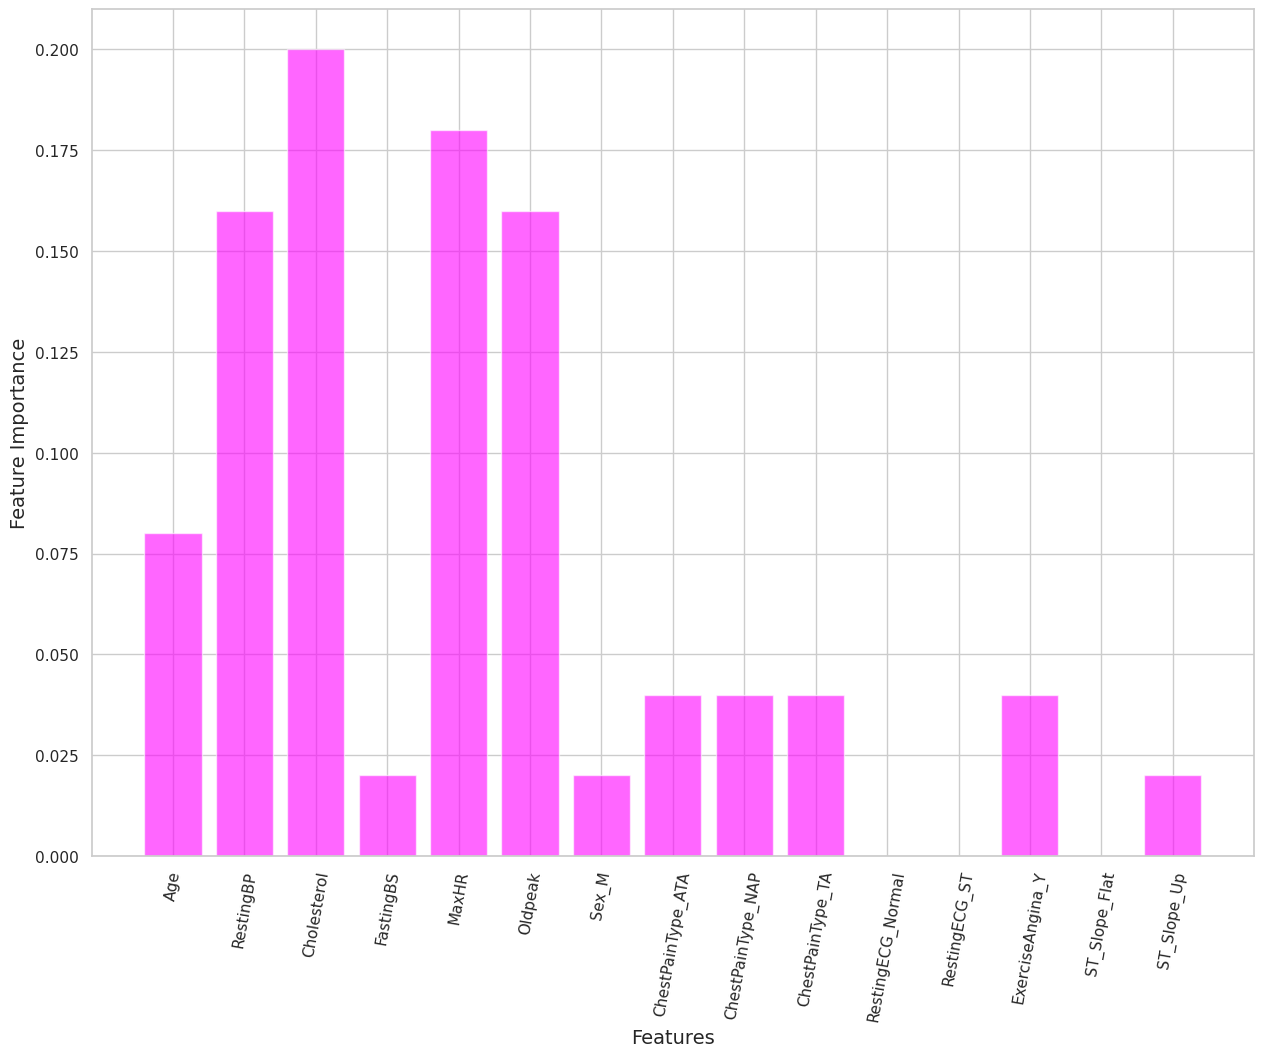

In [13]:
#### Let's plot the feature importance for AdaBoost

n_features = len(X_train.columns)

sns.set(style="whitegrid")

fig = plt.figure(figsize=(15, 11))
fig.tight_layout()
plt.bar(range(n_features), adaboost_classifier.feature_importances_, color="magenta", align="center", alpha=0.6)
plt.xticks(np.arange(n_features), X_train.columns.to_list(), rotation=80, fontsize=11)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)
# plt.savefig("./Feature_Importance_AdaBoost.png", dpi=300, bbox_inches='tight')
# xticks are not clipped with 'bbox'
plt.show()

### Voting Classifier

VotingClassifier combines different machine learning classifiers and use a voting rules ('soft' or 'hard') to predict the class labels. 

It balances out individual weaknesses of models when the performance of them are almost the same. 

### Soft and Hard Voting

#### Majority Voting (Hard):  

The predicted class label for a particular sample is the class label that represents the majority (mode) of the class labels predicted by each individual classifier

|Classifier| Class1 | Class2 | Class3 |
|-----|----|----|----|
|SVC|0.2|0.3|0.5|
|LogReg|0.3|0.4|0.3|
|AdaBoost|0.1|0.3|0.6|

SVC and AdaBoost both predicts Class3, so this one will be chosen. 

#### Soft Voting

Soft voting returns the class label as argmax of the sum of predicted probabilities; It's also possible to assign an weight array for the classifiers involved in creating the ensemble. Below is an example code block

```
svc_classifier = SVC(probability=True)
logreg_classifier = LogisticRegression()
adaboost_classifier = AdaBoostClassifier()

voting_classifier_soft = VotingClassifier(estimators=[('svm', svc_classifier), ('logreg', logreg_classifier),                                                 ('adaboost', adaboost_classifier)], voting='soft', weights=[1, 1, 1])

```



|Classifier| Class1 | Class2 | Class3 |
|-----|----|----|----|
|SVC|w1 * 0.2|w1 * 0.3|w1 * 0.5|
|LogReg|w2 * 0.3|w2 * 0.4|w2 * 0.3|
|AdaBoost|w3 * 0.1|w3 * 0.3|w1 * 0.6|
|Weighted Avg. |0.20|0.33|0.47|

Class3 will be chosen

In [14]:
from sklearn.ensemble import VotingClassifier

# Step 3: Create the Voting Classifier
# One can choose either 'hard' voting or 'soft' voting.
# 'hard' voting - Majority vote (best classifier is choosen)
# 'soft' voting - Weighted average of probabilities (combine all; we can also specify the weight array;
# usually all models have weight 1)

svc_classifier = SVC(probability=True)
voting_classifier_hard = VotingClassifier(estimators=[('svm', svc_classifier), ('logreg', logreg_classifier), ('adaboost', adaboost_classifier)],
                                          voting='hard')

voting_classifier_soft = VotingClassifier(estimators=[('svm', svc_classifier), ('logreg', logreg_classifier), ('adaboost', adaboost_classifier)],
                                          voting='soft')

# Step 4: Train the Voting Classifier on the training data
voting_classifier_hard.fit(X_train, y_train)
voting_classifier_soft.fit(X_train, y_train)

# Step 5: Make predictions on the test data
voting_predictions_hard = voting_classifier_hard.predict(X_test)
voting_predictions_soft = voting_classifier_soft.predict(X_test)

In [15]:
vc_precision_soft = precision_score(y_test, voting_predictions_soft)
vc_precision_hard = precision_score(y_test, voting_predictions_hard,)

vc_recall_soft = recall_score(y_test, voting_predictions_soft)
vc_recall_hard = recall_score(y_test, voting_predictions_hard)

vc_f1_soft = f1_score(y_test, voting_predictions_soft)
vc_f1_hard = f1_score(y_test, voting_predictions_hard)


# Print the evaluation metrics
print("VC_soft, VC_hard Precisions:", vc_precision_soft, vc_precision_hard)
print("VC_soft, VC_hard Recalls:", vc_recall_soft, vc_recall_hard)
print("VC_soft, VC_hard F1-scores:", vc_f1_soft, vc_f1_hard)

VC_soft, VC_hard Precisions: 0.8931297709923665 0.9076923076923077
VC_soft, VC_hard Recalls: 0.9212598425196851 0.9291338582677166
VC_soft, VC_hard F1-scores: 0.9069767441860465 0.9182879377431907


In [ ]:
list(heart_df['ClassLabel'].unique())

['Healthy', 'Ill']

In [23]:
class_types = list(heart_df['ClassLabel'].unique())

from sklearn.metrics import confusion_matrix, classification_report

def conf_matrix(predictions, plot_title:str, save_path:str):
    ''' Plots conf. matrix and classification report '''
    cm=confusion_matrix(y_test, predictions)
    print("Classification Report:\n")
    cr=classification_report(y_test, predictions,
                             target_names=[class_types[i] for i in range(len(class_types))])
    print(cr)
    plt.figure(figsize=(6, 6))
    plt.title('Confusion Matrix: %s'%(plot_title))
    sns_hmp = sns.heatmap(cm, annot=True, xticklabels = [class_types[i] for i in range(len(class_types))],
                yticklabels = [class_types[i] for i in range(len(class_types))], fmt="d")
    fig = sns_hmp.get_figure()
    fig.savefig(save_path, dpi=150)

Classification Report:

              precision    recall  f1-score   support

     Healthy       0.91      0.88      0.90       103
         Ill       0.91      0.93      0.92       127

    accuracy                           0.91       230
   macro avg       0.91      0.91      0.91       230
weighted avg       0.91      0.91      0.91       230



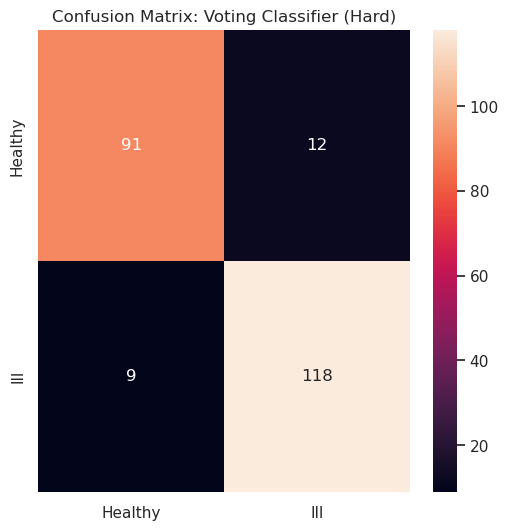

In [18]:
conf_matrix(voting_predictions_hard, 'Voting Classifier (Hard)', save_path='')

Classification Report:

              precision    recall  f1-score   support

     Healthy       0.87      0.86      0.87       103
         Ill       0.89      0.90      0.89       127

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



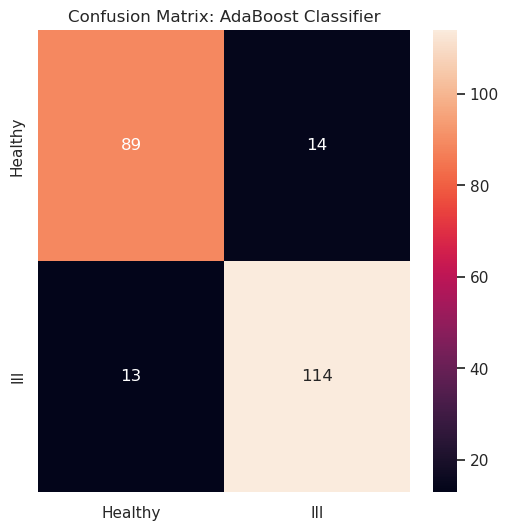

In [20]:
conf_matrix(adaboost_predictions, 'AdaBoost Classifier', save_path='')

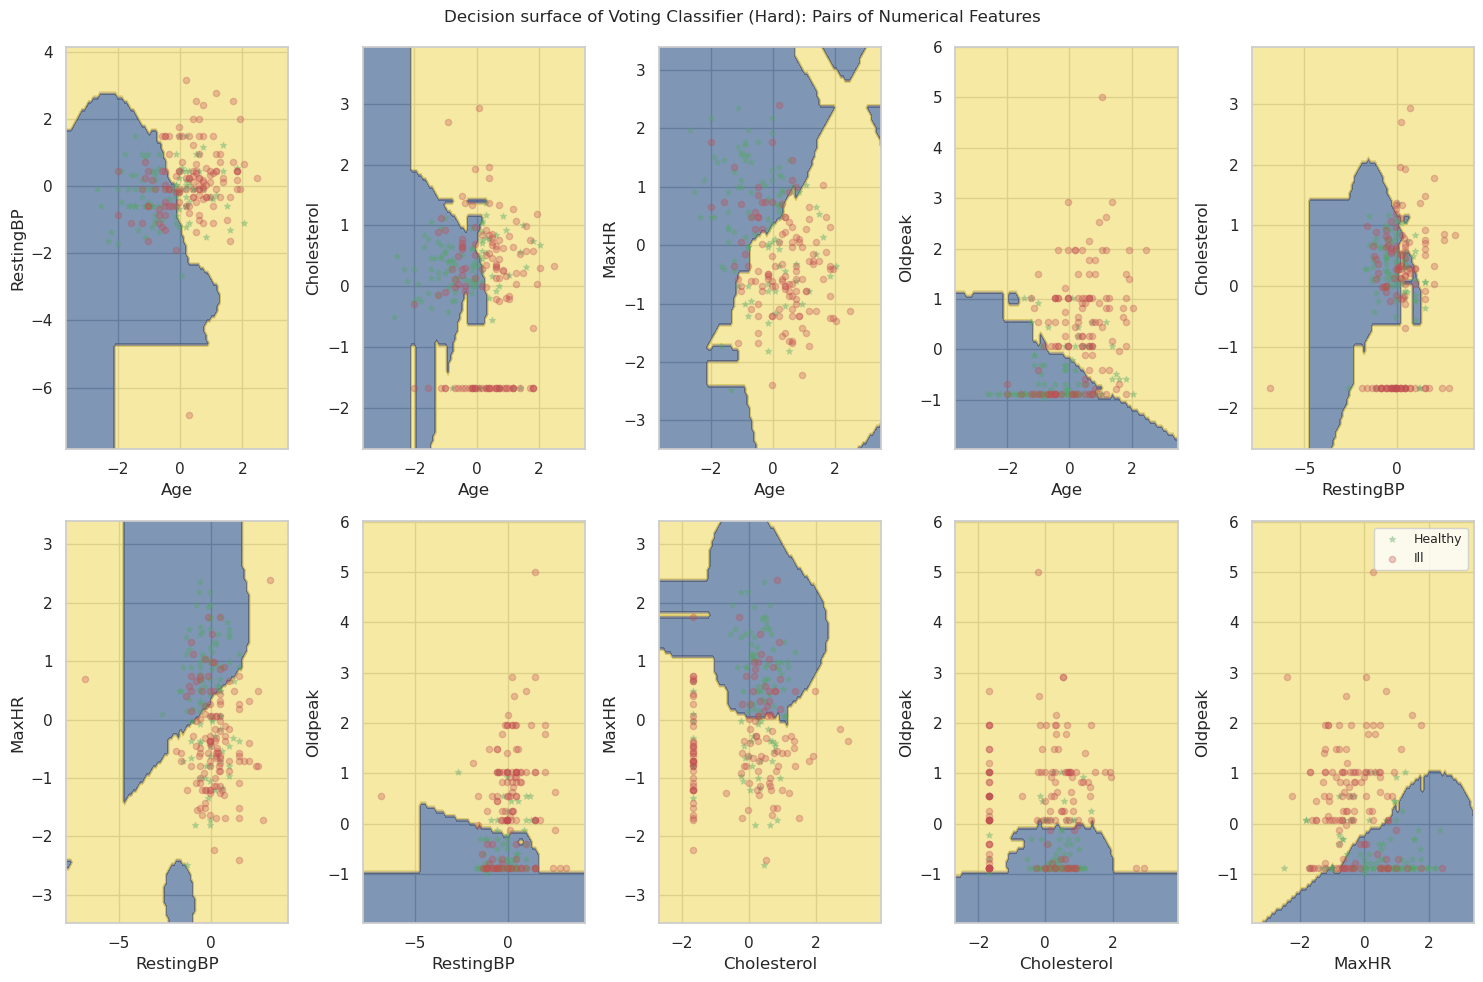

In [42]:
### Check the Effect of Voting Classifier

### select only the numerical cols

X_test_numeric = X_test[numerical_cols]

# Generating all pairs of numbers from 0 to 5
comb = combinations(np.arange(0, 5), 2)

# Using sets to obtain all unique combinations from 0 to 5 pairs
unique_combinations = set(comb)
labels = ['Healthy', 'Ill']

from sklearn.inspection import DecisionBoundaryDisplay


color_palette = plt.cm.cividis
plot_colors = ['g', 'r']
markers = ['*', 'o']
n_classes = len(y_train.unique())
plt.figure(figsize=(15, 10))

for pair_idx, pair in enumerate(sorted(unique_combinations)):
    # Only two corresponding features are taken each time
    X_test_cols = X_test_numeric.iloc[:, [pair[0], pair[1]]]

    # Creating and fitting the classifier to train data
    classifier = voting_classifier_hard.fit(X_test_cols, y_test)

    # Defining a grid of 5 columns and 2 rows
    ax = plt.subplot(2, 5, pair_idx + 1)
    # Plotting the pairs decision boundaries
    DecisionBoundaryDisplay.from_estimator(classifier,
                                           X_test_cols,
                                           cmap=color_palette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=X_test_numeric.columns.to_list()[pair[0]],
                                           ylabel=X_test_numeric.columns.to_list()[pair[1]],
                                           alpha = 0.5)

    # Plotting the training points according to y_train class colors
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_test == i)
        plt.scatter(X_test_cols.iloc[idx[:][0], 0],
                    X_test_cols.iloc[idx[:][0], 1],
                    c=color,
                    label=labels[i], marker=markers[i],
                    s=20, alpha=0.3)

plt.suptitle("Decision surface of Voting Classifier (Hard): Pairs of Numerical Features", fontsize=12)
plt.legend(loc="upper right", fontsize=9)
plt.tight_layout()
plt.show()

### Check GridSearch CV within Voting Classifier

It's also possible to tune parameters of individual estimator within VotingClassifier using GridSearch; Let's see an example below: 

In [21]:
svc_classifier = SVC(probability=True) #kernel = rbf 

voting_classifier_hard = VotingClassifier(estimators=[('svm', svc_classifier), ('logreg', logreg_classifier), 
                                                      ('adaboost', adaboost_classifier)], voting='hard')


# 0.1, 0.5,
params = {'svm__C':[0.1, 0.5, 1, 30, 75,  100], 
          'svm__gamma':[0.005, 0.01, 0.05, 1, 10, 100], 
          'logreg__C':[0.05, 0.1, 0.5, 1, 30, 75, 100], 'adaboost__n_estimators':[20, 50, 70]}


from sklearn.model_selection import GridSearchCV
from tqdm.notebook import tqdm

for cv in tqdm(range(3, 6)):
    create_grid = GridSearchCV(estimator=voting_classifier_hard, param_grid=params, cv=cv)
    create_grid.fit(X_train, y_train)
    print ('score for %d fold CV := %3.2f'%(cv, create_grid.score(X_test, y_test)))
    print ('!!!!!!!! Best Params from Grid Search CV !!!!!!!!')
    print (create_grid.best_params_)

print ('Out of the Loop')



  0%|          | 0/3 [00:00<?, ?it/s]

score for 3 fold CV := 0.90
!!!!!!!! Best Params from Grid Search CV !!!!!!!!
{'adaboost__n_estimators': 70, 'logreg__C': 0.05, 'svm__C': 30, 'svm__gamma': 0.01}
score for 4 fold CV := 0.90
!!!!!!!! Best Params from Grid Search CV !!!!!!!!
{'adaboost__n_estimators': 20, 'logreg__C': 0.05, 'svm__C': 30, 'svm__gamma': 1}
score for 5 fold CV := 0.90
!!!!!!!! Best Params from Grid Search CV !!!!!!!!
{'adaboost__n_estimators': 50, 'logreg__C': 0.05, 'svm__C': 30, 'svm__gamma': 0.05}
Out of the Loop


In [22]:
print ('grid CV best params: ', create_grid.best_params_)

grid CV best params:  {'adaboost__n_estimators': 50, 'logreg__C': 0.05, 'svm__C': 30, 'svm__gamma': 0.05}


Classification Report:

              precision    recall  f1-score   support

     Healthy       0.91      0.87      0.89       103
         Ill       0.90      0.93      0.91       127

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



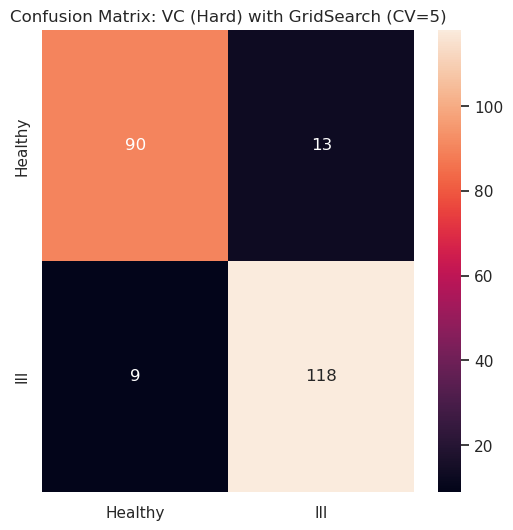

In [24]:
grid_CV_predictions = create_grid.predict(X_test)

conf_matrix(grid_CV_predictions, 'VC (Hard) with GridSearch (CV=5)', save_path='./GridCV_VC.png')

In [25]:
### Used libraries and versions:
import matplotlib as mpl
import scipy as scp
import sklearn as skl

print ('Matplotlib: ', mpl.__version__)
print ('Numpy: ', np.__version__)
print ('Scipy: ', scp.__version__)
print ('Pandas: ', pd.__version__)
print ('Seaborn: ', sns.__version__)
print ('sklearn: ', skl.__version__)

Matplotlib:  3.7.1
Numpy:  1.24.3
Scipy:  1.10.1
Pandas:  1.5.3
Seaborn:  0.12.2
sklearn:  1.3.0
